<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Diego Espinoza
- Nombre de alumno 2: Juan Miño


### **Link de repositorio de GitHub:** [Laboratorio 6: MDS7202](https://github.com/juansebm/MDS7202)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [2]:
!pip install xgboost

#### 1. Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)

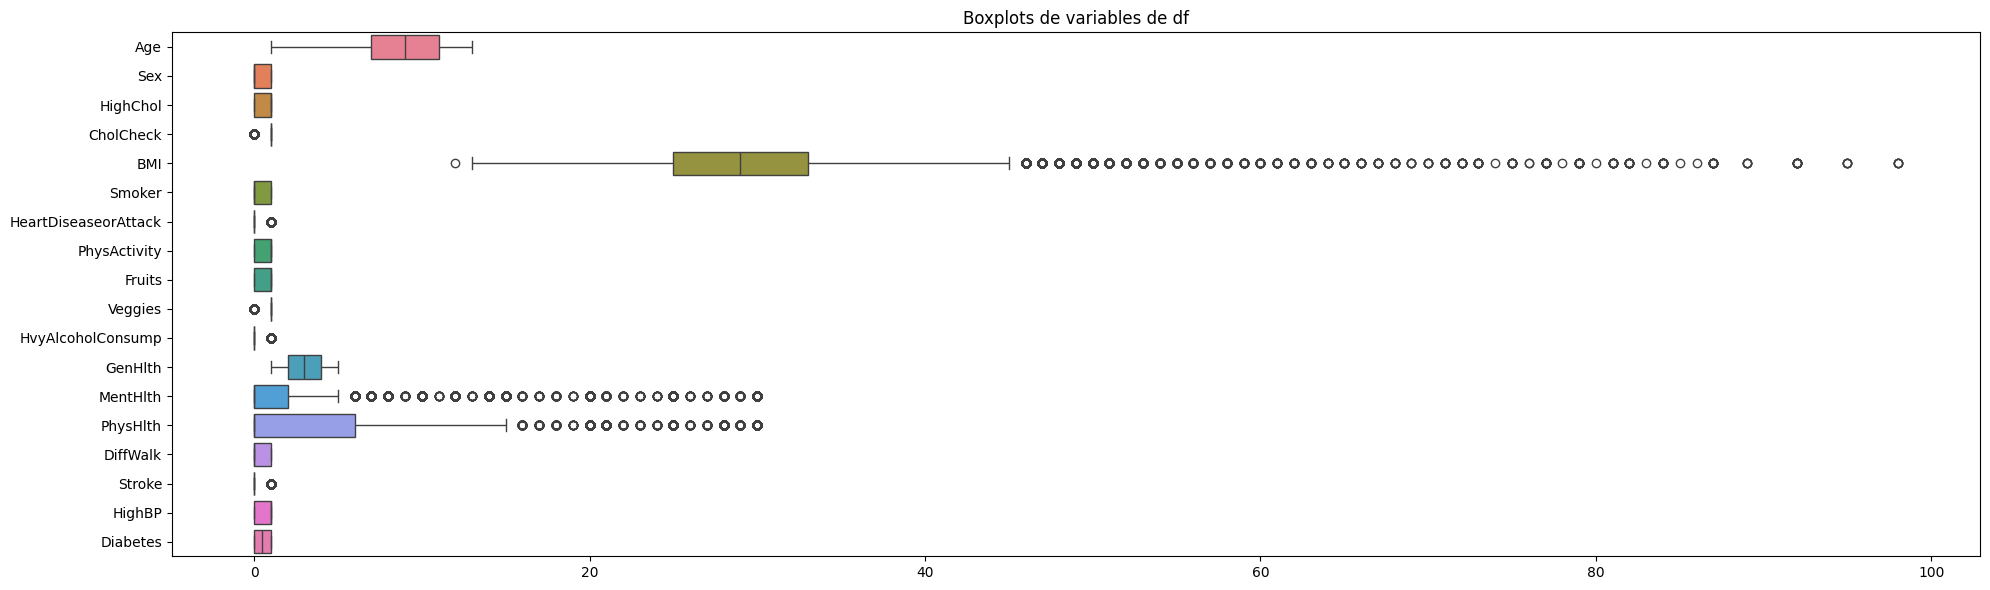

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.boxplot(data=df, orient='h')
plt.title("Boxplots de variables de df")
plt.tight_layout()
plt.show()

Hace falta escalar.

In [4]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

Visualizamos de nuevo.

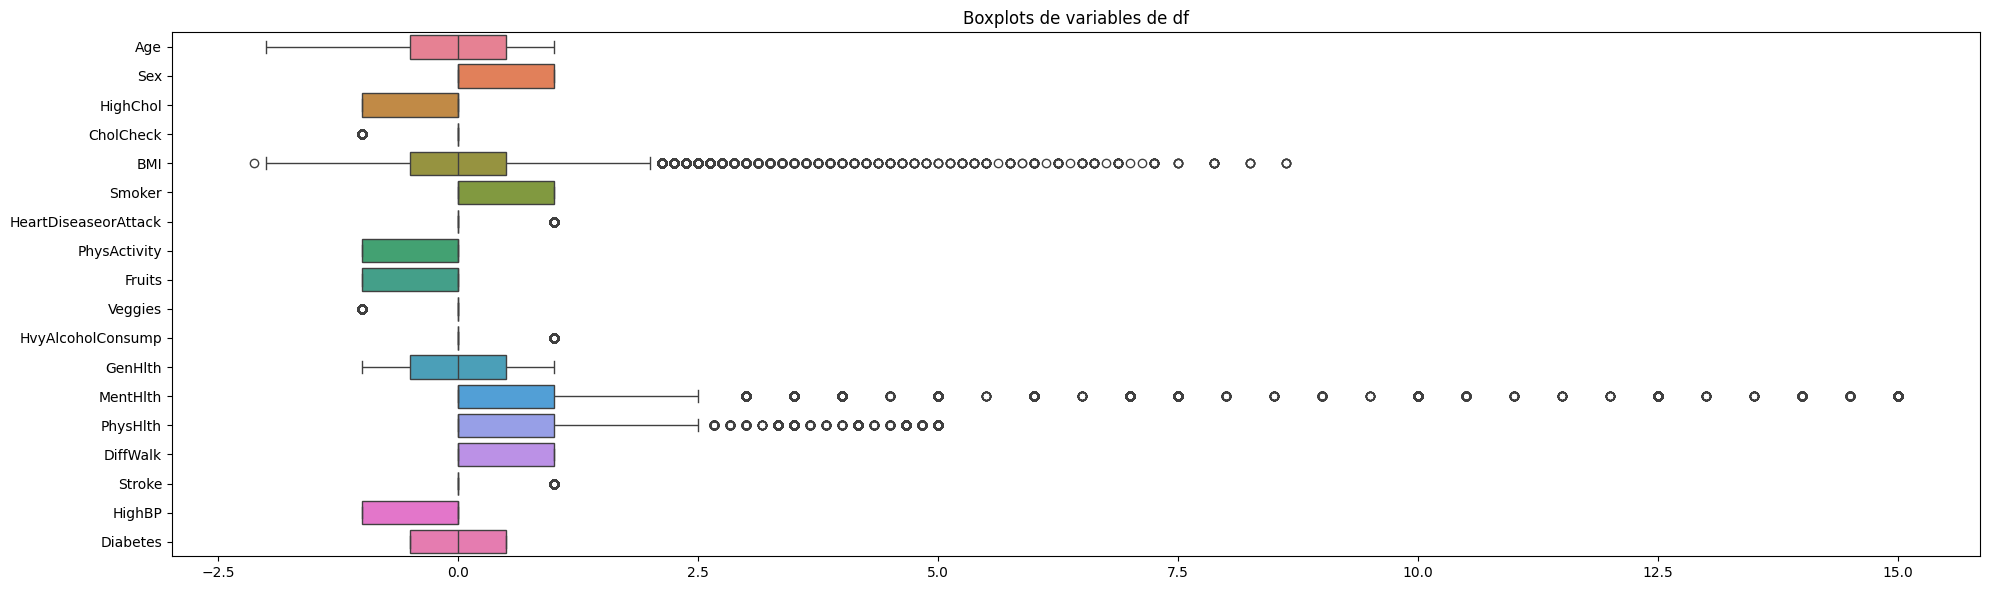

In [5]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=scaled_df, orient='h')
plt.title("Boxplots de variables de df")
plt.tight_layout()
plt.show()

#### 2. Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)

Creamos los conjuntos

In [6]:
labels = df.loc[:, "Diabetes"]
features = df.drop(columns=["Diabetes"])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=1/3,
    random_state=42,
    shuffle=True,
    stratify=labels,
)

#### 3. Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)

Ahora el ColumnTransformer (debe escalar y luego dividir). Escalaremos solo algunas variables esta vez.

In [8]:
from sklearn.compose import ColumnTransformer

columnas = X_train.columns.tolist()
print(columnas)

ct = ColumnTransformer(
    [
        ("Scaler",RobustScaler(), columnas),
    ], verbose_feature_names_out=False
    ).set_output(transform="pandas")

['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP']


#### 4.  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)


Creamos el pipeline e integramos el pre procesamiento, junto a XGBoost:

In [9]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

pipeline = Pipeline(steps=[
    ("preprocessing", ct),
    ("classifier", XGBClassifier(use_label_encoder=False))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     11782
         1.0       0.73      0.79      0.76     11782

    accuracy                           0.75     23564
   macro avg       0.75      0.75      0.75     23564
weighted avg       0.75      0.75      0.75     23564



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [08:20:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


¿Es acaso un buen predictor de diabetes? (0.5 puntos)

Respuesta: El modelo XGBClassifier en efecto es un buen clasificador, al menos tiene un f1-scor de alrededor de 0.75, y las métricas de precisión, recall y f1-score para ambas clases (personas con diabetes o sin diabetes) son igual de buenas (quizás en parte porque los datos están balanceados es porque a pesar de que no le entregamos casi ningún hiperparámetro al Xgboost classifier tiene buenas métricas).

¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)

Respuesta: 
  - Accuracy: Qué fracción de pacientes (con o sin diabetes) se clasificaron correctamente (si tiene diabetes y en efecto se predijo que lo tenía, o si no tiene y se predijo que no lo tiene).
  - Precision: Qué proporción de los diagnosticados con diabetes realmente la tienen.
  - Recall: Qué proporción de los pacientes con diabetes fueron correctamente detectados (más enfocado en los verdaderos positivos).
  - F1-score: Equilibrio entre detectar correctamente diabetes y evitar falsos diagnósticos (recordemos que es la media armónica de la predicision y el recall).

¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

Respuesta: Las métricas mencionadas anteriormente sirven para la tarea de clasificación, pero no indican directamente si las características seleccionadas son las más adecuadas. Para evaluar la calidad de las características, es necesario aplicar análisis como la importancia de variables, selección de características o bien modelos explicativos (enfocados a la interpretabilidad).

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

In [10]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('Scaler', RobustScaler(),
                                  ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI',
                                   'Smoker', 'HeartDiseaseorAttack',
                                   'PhysActivity', 'Fruits', 'Veggies',
                                   'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
                                   'PhysHlth', 'DiffWalk', 'Stroke',
                                   'HighBP'])],
                   verbose_feature_names_out=False),
 'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learnin

In [11]:
from xgboost import plot_importance

1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)

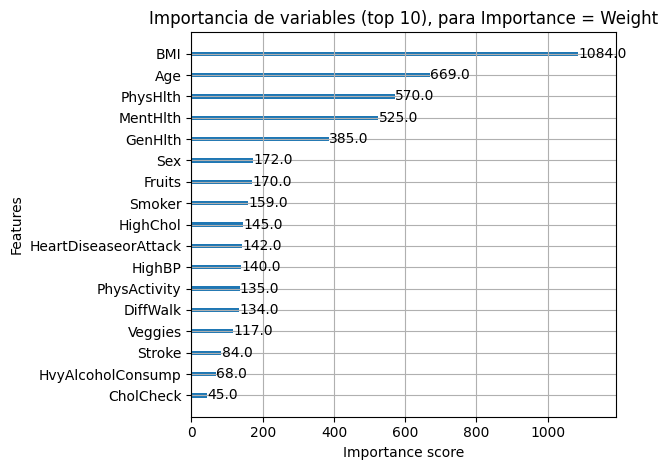

In [12]:
#primero que todo hacemos el plot_importance pero con el tipo de importancia igual a "weight"
plot_importance(pipeline.named_steps["classifier"].get_booster(), importance_type='weight', show_values=True)
plt.title("Importancia de variables (top 10), para Importance = Weight")
plt.tight_layout()
plt.show()

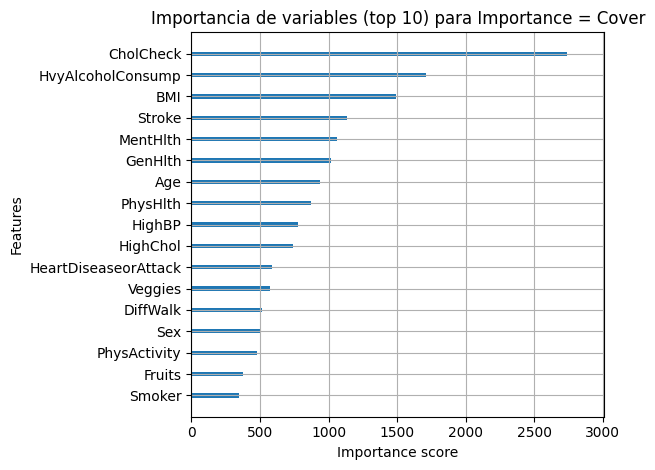

In [13]:
#en segundo lugar, hacemos el plot_importance según el tipo de importancia "cover";
plot_importance(pipeline.named_steps["classifier"].get_booster(), importance_type='cover', show_values=False)
plt.title("Importancia de variables (top 10) para Importance = Cover")
plt.tight_layout()
plt.show()

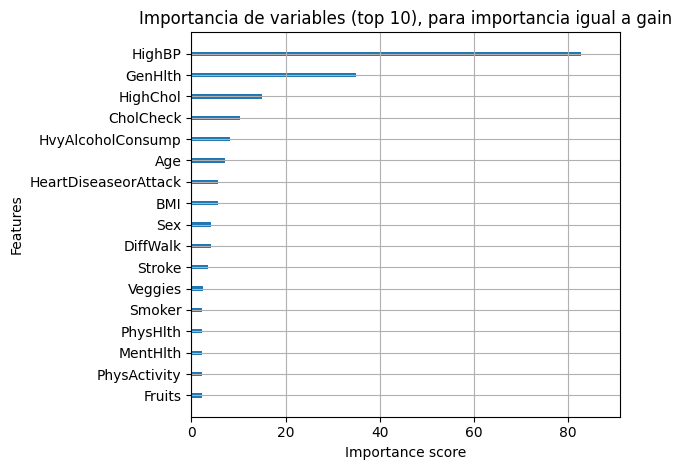

In [14]:
#por último hacemos lo mismo pero para el tipo de importancia "gain"
plot_importance(pipeline.named_steps["classifier"].get_booster(), importance_type='gain', show_values=False)
plt.title("Importancia de variables (top 10), para importancia igual a gain")
plt.tight_layout()
plt.show()

2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)

    respuesta: los resultados obtenidos difieren principalmente por el hecho de que con Weight se cuenta cuántas veces se usó cada feature para hacer un split, en todos los árboles y en todas las clases. La limitación es que puede sobrevalorar features usadas muchas veces, aunque no siempre sean útiles para alguna métrica específica. 

    Por otro lado, en cuanto a cover, mide cuántos datos en promedio son afectados por los splits hechos con esa feature (es decir, cuántas filas se ven afectadas).

    Por último, gain nos dice cuánta mejora promedio del criterio de partición (por ejemplo, log loss) genera una feature cuando se usa. Este es recomendado cuando queremos saber cuáles features *realmente* ayudan al modelo. 

    Por lo tanto, los resultados con los tres métodos no son compatibles porque no tienen un mismo objetivo. Si quedan dudas podemos ver [la siguiente referencia con la documentación](https://xgboost.readthedocs.io/en/release_1.0.0/python/python_api.html)







3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

    Como se sugiere en [esta otra página](https://medium.com/@emilykmarsh/xgboost-feature-importance-233ee27c33a4), es una sugerencia buena utilizar los valores SHAP para proporcionar una evaluación más consistente y precisa de la importancia de las características. Por lo tanto, como cada métrica resalta distintos aspectos, ni captan interacciones entre variables, ni tampoco puede reflejar la contribución de una variable que aparece poco, o que tiene poca interpretabilidad.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [15]:
from sklearn.inspection import permutation_importance
import numpy as np

1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)

In [16]:
feat_names = pipeline.named_steps["classifier"].get_booster().feature_names
feat_names

['Age',
 'Sex',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Stroke',
 'HighBP']

2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)

    Respuesta: La desviación estándar muy pequeña para las importancias de las features indica que es muy seguro encontrar el valor "real" de la importancia de cada feature, o bien que la mayoría de los posibles de las importancias de cada feature se concentran alrededor del promedio de dichas importancias. 

In [17]:
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)
result

{'importances_mean': array([ 2.78744412e-02,  3.16867538e-03,  1.18669722e-02,  3.79958128e-03,
         3.10685792e-02, -2.26333956e-05,  4.54506875e-03,  2.58869462e-04,
         2.63113224e-04,  5.51689017e-04,  3.26203814e-03,  5.56753239e-02,
         4.11644882e-04,  2.42743168e-03,  2.42035874e-03,  1.33112658e-03,
         1.62224863e-02]),
 'importances_std': array([0.00158719, 0.00084991, 0.00140025, 0.00041053, 0.00203085,
        0.00050698, 0.00065169, 0.00060368, 0.00077723, 0.00054014,
        0.00058452, 0.00193517, 0.0007984 , 0.0009975 , 0.00071151,
        0.00039681, 0.0016823 ]),
 'importances': array([[ 2.62264471e-02,  2.93243931e-02,  2.74995756e-02,
          2.57596333e-02,  2.81361399e-02,  2.77117637e-02,
          3.03853336e-02,  2.97063317e-02,  2.92819555e-02,
          2.71600747e-02,  2.45289425e-02,  2.54625700e-02,
          2.72025123e-02,  2.86878289e-02,  2.74995756e-02,
          2.73298252e-02,  2.98336445e-02,  2.94092684e-02,
          2.75420

3. Visualice los resultados de este método en un gráfico. (2 puntos)

/var/folders/09/2_xdwnnx5rqgtl8vh2vwkdmc0000gn/T/ipykernel_1309/4057500351.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


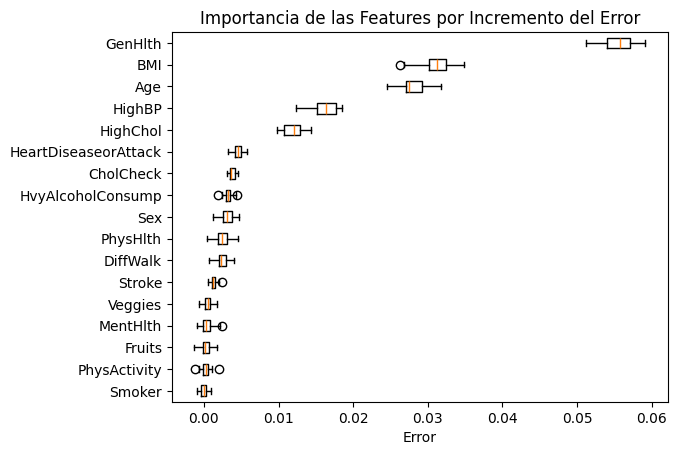

In [18]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(feat_names)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

In [19]:
from sklearn.inspection import permutation_importance

sorted_idx = perm_sorted_idx[::-1]
top_5_idx = sorted_idx[:5]

top_5_feature_names = np.array(feat_names)[top_5_idx]

print("Top 5 features por importancia:", top_5_feature_names)

Top 5 features por importancia: ['GenHlth' 'BMI' 'Age' 'HighBP' 'HighChol']


In [20]:
booster = pipeline.named_steps["classifier"].get_booster()
import pandas as pd

importance_types = ["weight", "gain", "cover"]

top_5_features = {}

for importance_type in importance_types:
    scores = booster.get_score(importance_type=importance_type)
    df = pd.DataFrame(scores.items(), columns=["Feature", importance_type])
    df_sorted = df.sort_values(by=importance_type, ascending=False)
    top_5_features[importance_type] = df_sorted.head(5)

for key in top_5_features:
    print(f"\nTop 5 features por {key.upper()}:")
    print(top_5_features[key].to_string(index=False))



Top 5 features por WEIGHT:
 Feature  weight
     BMI  1084.0
     Age   669.0
PhysHlth   570.0
MentHlth   525.0
 GenHlth   385.0

Top 5 features por GAIN:
          Feature      gain
           HighBP 82.733116
          GenHlth 35.022163
         HighChol 14.962948
        CholCheck 10.268684
HvyAlcoholConsump  8.262342

Top 5 features por COVER:
          Feature       cover
        CholCheck 2738.051758
HvyAlcoholConsump 1707.555542
              BMI 1494.501343
           Stroke 1138.007690
         MentHlth 1059.744629


4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)

    Respuesta: [Según Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html), dicha función devuelve la importancia promedio de cada feature sobre ´n_repeats´. Para cada feature se permuta o mezcla su columna en los datos de test (es decir, dentro de la misma columna se permutan aleatoriamente todos los datos, manteniendo la distribución original pero no la relación con la variable objetivo que en nuestro caso es si la persona tiene diabetes o no), rompiendo la relación con la variable objetivo y se mide cuánto disminuye el rendimiento del modelo (que por definición dicho score es accuracy para clasificación). Este proceso se repite n_repeats veces para mitigar la variabildiad introducida por la permutación aleatoria. Básicamente la importancia mide la diferencia de importancias entre una métrica baseline y una métrica con una columna permutada.

  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)

    Respuesta: Las features con mayor importancia son GENHLTH, BMI, AGE, HIGHBP y HIGHCHOL. Esto tiene sentido porque, al ser permutadas en el conjunto de prueba, generan el mayor aumento en el error del modelo, lo que indica que el modelo depende fuertemente de ellas para realizar predicciones precisas. Esta importancia tiene también respaldo clínico, ya que estas variables están estrechamente asociadas con factores de riesgo conocidos para la diabetes, como la obesidad (HIGHHBP), la edad avanzada (AGE), la hipertensión (MBI) y niveles altos de colesterol (HIGHCHOL), además de la percepción general de mala salud (GENHLTH).

  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)

    Respuesta: weight destaca a BMI, Age, PhysHlth, MentHlth y GenHlth por su frecuencia en los árboles;
gain resalta HighBP, GenHlth, HighChol, CholCheck y HvyAlcoholConsump por la ganancia de información que aportan;
cover muestra como relevantes a CholCheck, HvyAlcoholConsump, BMI, Stroke y MentHlth, por el número promedio de muestras cubiertas. La aparición repetida de variables como GenHlth, BMI y HighBP sugiere que estas sí tienen un impacto real y robusto en la predicción de diabetes, lo que refuerza su relevancia clínica y estadística.

  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

    Respuesta: La primera ventaja es que Permutation Importance es un [modelo Agnóstico](https://scikit-learn.org/stable/modules/permutation_importance.html), lo que quiere decir que puede aplicarse a cualquier modelo ya entrenado, sin importar su tipo o complejidad. La segunda ventaja es que se eliminan efectos que provienen de su [interaccion con otras variables](https://christophm.github.io/interpretable-ml-book/feature-importance.html) como tambien efectos directos, lo que nos proporciona una visión más completa de su importancia. La última ventaja es que no requiere que el modelo se re-entrene para evaluar la importancia de sus características, lo que ahorra tiempo computacional (ver [la referencia](https://coralogix.com/ai-blog/permutation-importance-pi-explain-machine-learning-predictions/)). 
    
    Por otro lado, la primera desventaja es que si dos características están altamente correlacionadas, permutar una puede no mostrar una disminución significativa en el rendimiento, subestimando su importancia. La segunda desventaja es que dado que implica permutaciones aleatorias, los resultados pueden variar entre ejecuciones (por eso se recomienda realizar múltiples repeticiones para obtener estimaciones más estables, modificando el parámetro n_repeats). La última desventaja es que este método indica qué tan importante es una característica, pero no si su efecto en la predicción es positivo o negativo (es decir, si produce mejores predicciones o algunas peores).


## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [ ]:
#!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 7.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for shap: filename=shap-0.47.2-cp313-cp313-macosx_10_13_universal2.whl size=638612 sha256=6c404221ed5ec57b242884db2b5dd0ba4c74268108b05543365b459a61c7b31d
  Stored in directory: /Users/diegoespinoza/Library/Caches/pip/wheels/e2/dd/cb/7e03548687d1c474ee794d615c7747b9d5c79f3519d817dcbb
Successfully built shap
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [shap]3/4 [shap]]te]


In [22]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [37]:
import shap
model = pipeline.named_steps['classifier']
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Para hacer el gráfico de los valores SHAP, nos basamos en la [referencia de aqui](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

In [57]:
X_test.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP'],
      dtype='object')

1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)

In [58]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
#El número del índice de paciente indica el número del paciente en la lista original 
indice_paciente = 0

shap_values[indice_paciente]

.values =
array([ 0.42601946,  0.08977851,  0.11549211,  0.01863741, -0.57344574,
        0.04305728, -0.07532926, -0.27942315, -0.4181552 , -0.04431343,
        0.00784538,  1.1773438 ,  0.04013434, -0.16404818,  0.13336566,
        0.00391913,  0.7333255 ], dtype=float32)

.base_values =
-0.008321905

.data =
array([ 9.,  1.,  1.,  1., 26.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  0.,
        0.,  0.,  0.,  1.])

2. ¿Qué representa cada número en su resultado? (1 punto)

El shap_values[0].values son los valores SHAP para ese paciente en particular, donde cada número mide cuánto contribuye una feature a mover la predicción respecto del valor base (es decir, el sesgo del modelo sin saber nada del paciente). Los valores positivos empujan la predicción hacia la clase positiva (diabetes), y los valores negativos empujan la predicción hacia la clase negativa (no diabetes). Por ejemplo, el 1.17 en posición 11 aumenta mucho la probabilidad de que el paciente tenga diabetes, y el -0.57 en posición 4 disminuye esa probabilidad.


El shap_values[0].base_values = -0.0083 es el valor promedio de salida del modelo (log-odds, dado que estamos haciendo clasificación binaria conn XGBoost). Este número es la predicción sin usar ninguna feature, es decir, el sesgo del modelo, que es la esperanza del modelo sin ninguna variable conocida.


Por último, shap_values[0].data son los valores reales de las features del paciente correspondiente. 

A continuación explicamos lo mismo pero matemática/algebraicamente. Si tenemos un modelo $ f: \mathbb{R}^p \to \mathbb{R} $ que predice un valor a partir de $ p $ variables o características de entrada, entonces los **SHAP values** asignan a cada feature $ j $ una contribución $ \phi_j $ a la predicción $ f(x) $, basada en teoría de juegos.

---
Se le llama **sesgo del modelo** o *base value* (valor base o salida esperada del modelo) a:
$$
\phi_0 = \mathbb{E}[f(x)]
$$

Es decir, el valor promedio que predice el modelo cuando **no se conoce ninguna variable de entrada**. Nota: se llama sesgo no en el sentido de ser la diferencia de la esperanza de un estimador y el verdadero valor, sino en el sentido de que "se le llama sesgo en analogía con la regresión lineal, onde el intercepto es la predicción cuando todas las variables son cero."

---

Dada una instancia $ x \in \mathbb{R}^p $, la predicción del modelo o salida predicha para esa observación específica se puede expresar como:

$$
f(x) = \phi_0 + \sum_{j=1}^p \phi_j
$$

Donde:

- $ \phi_0 $: Valor base (sesgo del modelo).
- $ \phi_j $: Contribución marginal de la **feature $ j $** a la predicción, explicando cuánto cambia el modelo al incluirla. Donde además, 

$$
\phi_j = \sum_{S \subseteq F \setminus \{j\}} \frac{|S|!(p - |S| - 1)!}{p!} \left[ f(x_{S \cup \{j\}}) - f(x_S) \right]
$$

- $ S $: subconjunto de features que **no incluye** a $ j $.
- $ f(x_S) $: salida esperada del modelo si solo se conocen las variables en $ S $.
- $ f(x_{S \cup \{j\}}) $: salida esperada si además se conoce $ x_j $.

Este valor representa la **contribución marginal promedio de la feature $ j $**, promediada sobre todas las posibles combinaciones $ S $. Para evaluar $ f(x_S) $, es decir, el valor esperado del modelo **cuando solo conocemos algunas features**, existen dos formas:

#### 1. **Esperanza condicional observacional**:

$$
f(x_S) = \mathbb{E}_{x_{F \setminus S} \sim D}[f(x_S, x_{F \setminus S})]
$$

- Interpretación: usamos la distribución real de los datos para estimar cómo se comporta el modelo.
- Limitación: depende de las correlaciones entre variables, y puede ser sesgada si hay dependencia espuria.

#### 2. **Esperanza condicional intervencional** (más usada en SHAP):

$$
f(x_S) = \mathbb{E}[f(x) \mid \text{set } x_S]
$$

- Interpretación: "fijamos" las features en $ S $ y vemos qué predice el modelo.
- Ventaja: permite analizar el efecto de intervenir directamente sobre una variable y es computacionalmente más sencilla.

---

- El cálculo exacto de SHAP values es **NP-hard**: implica evaluar $ 2^p $ subconjuntos posibles. Donde recordemos que np-hard es un problema cuyo costo computacional crece exponencialmente.
- SHAP usa aproximaciones eficientes, como TreeSHAP para modelos de árboles, que reducen la complejidad a polinomial.



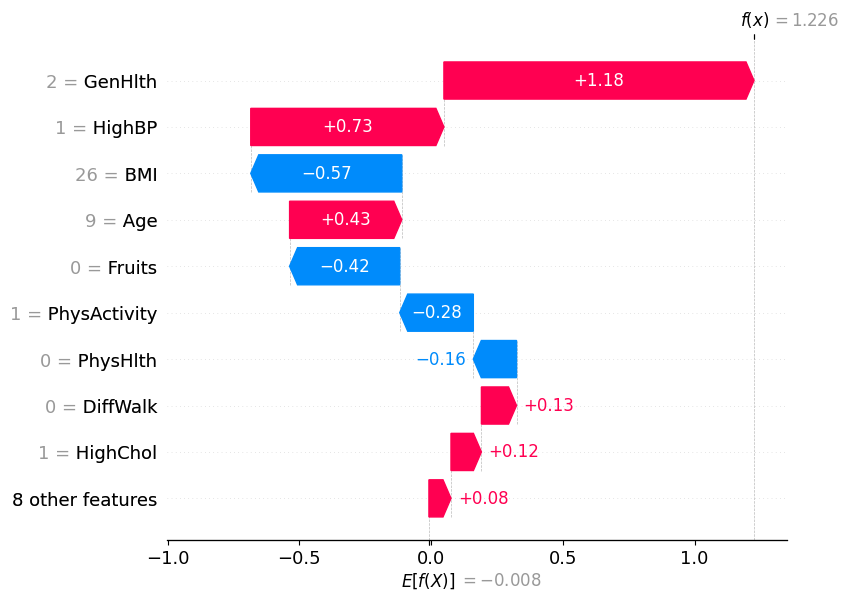

In [ ]:
shap.plots.waterfall(shap_values[indice_paciente], max_display=10)

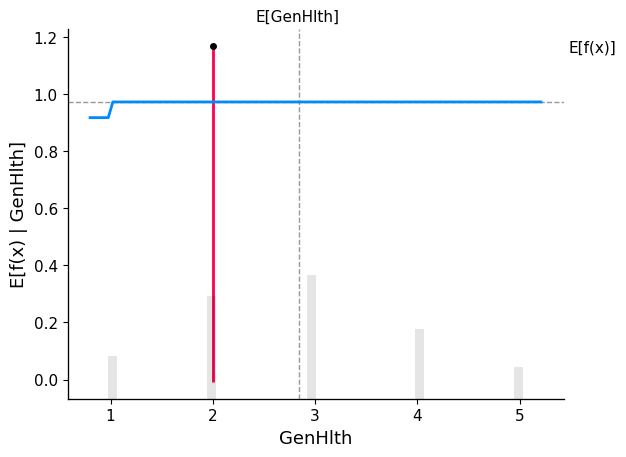

In [ ]:
nombre_feature = "GenHlth"

shap.partial_dependence_plot(
    nombre_feature,
    model.predict,
    X_test,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[indice_paciente : indice_paciente + 1, :]
)

3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

    Respuesta: Sabemos que los valores SHAP me dicen por qué el modelo predice lo que predice para cada paciente y los graficos PDP me dicen cómo cambia la predicción en promedio cuando modifico una variable. Además, podemos decir que un valor positivo para una feature indica que ella aumenta la predicción del modelo respecto al valor base (la probabilidad promedio), y uno negativo implica que disminuye la predicción o probabilidad respecto al valor base. (Ojo que esto solo aplica a priori sobre modelos de clasificación como es nuestro caso).

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

Paciente 1


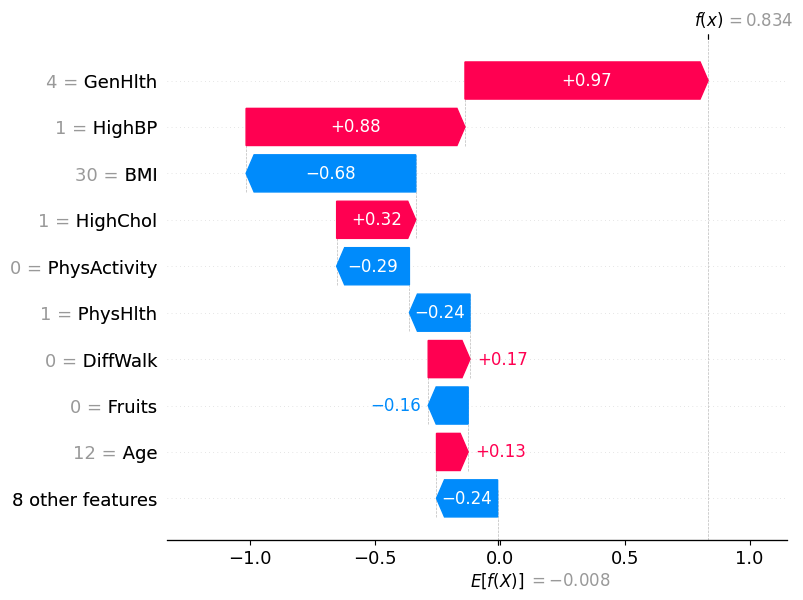

Variables que afectan positivamente la predicción:
['Age', 'CholCheck', 'DiffWalk', 'GenHlth', 'HighBP', 'HighChol', 'HvyAlcoholConsump']
Variables que afectan negativamente la predicción:
['BMI', 'Fruits', 'HeartDiseaseorAttack', 'MentHlth', 'PhysActivity', 'PhysHlth', 'Sex', 'Smoker', 'Stroke', 'Veggies']
Paciente 9


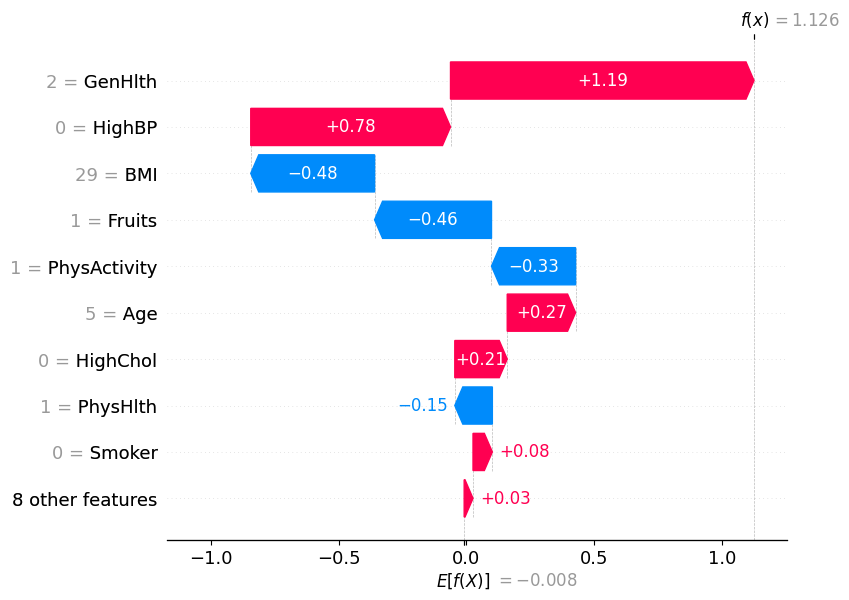

Variables que afectan positivamente la predicción:
['Age', 'CholCheck', 'DiffWalk', 'GenHlth', 'HighBP', 'HighChol', 'HvyAlcoholConsump', 'MentHlth', 'Sex', 'Smoker', 'Stroke']
Variables que afectan negativamente la predicción:
['BMI', 'Fruits', 'HeartDiseaseorAttack', 'PhysActivity', 'PhysHlth', 'Veggies']
Paciente 150


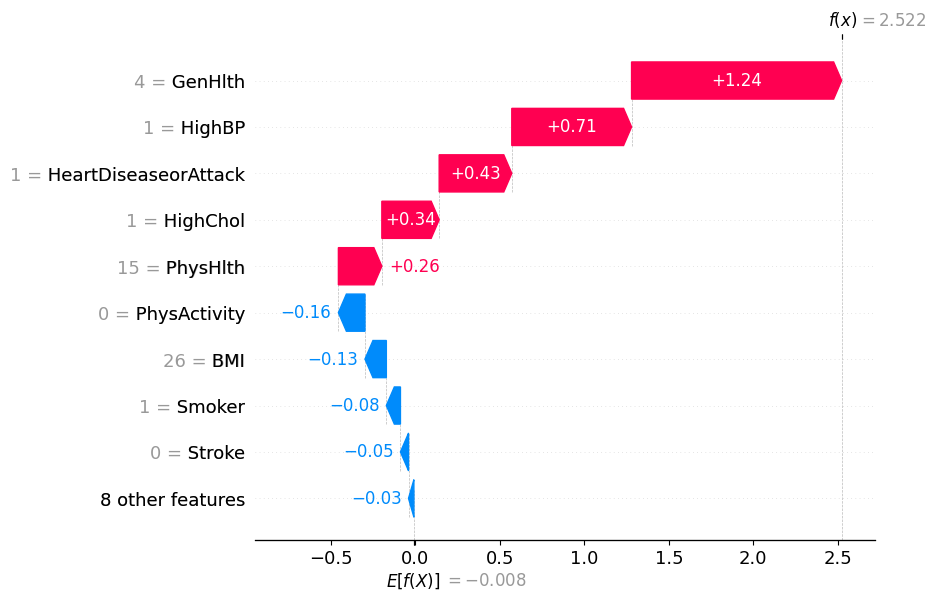

Variables que afectan positivamente la predicción:
['CholCheck', 'DiffWalk', 'GenHlth', 'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'HvyAlcoholConsump', 'PhysHlth', 'Sex']
Variables que afectan negativamente la predicción:
['Age', 'BMI', 'Fruits', 'MentHlth', 'PhysActivity', 'Smoker', 'Stroke', 'Veggies']
VARIABLES COMUNES EN TODOS LOS PACIENTES:
Variables que afectan positivamente a todos los pacientes:
['CholCheck', 'DiffWalk', 'GenHlth', 'HighBP', 'HighChol', 'HvyAlcoholConsump']
Variables que afectan negativamente a todos los pacientes:
['BMI', 'Fruits', 'PhysActivity', 'Veggies']


In [63]:
import numpy as np

vars_positivas_todos = None
vars_negativas_todos = None

for indice in [1, 9, 150]:
    print(f"Paciente {indice}")
    shap.plots.waterfall(shap_values[indice], max_display=10)

    valores_shap = shap_values[indice].values
    nombres_variables = shap_values[indice].feature_names

    indices_positivos = np.where(valores_shap > 0)[0]
    vars_positivas = set(nombres_variables[i] for i in indices_positivos)

    indices_negativos = np.where(valores_shap < 0)[0]
    vars_negativas = set(nombres_variables[i] for i in indices_negativos)

    print("Variables que afectan positivamente la predicción:")
    print(sorted(vars_positivas))

    print("Variables que afectan negativamente la predicción:")
    print(sorted(vars_negativas))

    if vars_positivas_todos is None:
        vars_positivas_todos = vars_positivas
        vars_negativas_todos = vars_negativas
    else:
        vars_positivas_todos &= vars_positivas
        vars_negativas_todos &= vars_negativas

print("VARIABLES COMUNES EN TODOS LOS PACIENTES:")
print("Variables que afectan positivamente a todos los pacientes:")
print(sorted(vars_positivas_todos))

print("Variables que afectan negativamente a todos los pacientes:")
print(sorted(vars_negativas_todos))


2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

    Respuesta: Las variables que afectan positivamente a todos los pacientes son: 'CholCheck', 'DiffWalk', 'GenHlth', 'HighBP', 'HighChol' y 'HvyAlcoholConsump' (como era de esperarse), y además las que afectan negativamente la probabilidad son 'BMI', 'Fruits', 'PhysActivity' y 'Veggies' (lo que sorprende porque quizás ser vegano implique tener menor probabilidad de tener para estos pacientes, diabetes).

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

    Respuesta: El primer patrón en común que tienen es que al menos 8 features tienen una contribución casi nula (de menos de 0.3 en valor absoluto). Otro patrón es que todos tienen una tendencia a tener la predicción hacia la derecha de la esperanza base (o sesgo, que no es en realidad un sesgo como se entiende generalmente en estadística, como ya se dijo). Esto indica que dichos tres pacientes tienen características que en conjunto hacen que el modelo prediga un valor superior al promedio general.

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)
  
    Respuesta: quizás es posible generalizar el hecho de que la predicción sea a la derecha del "sesgo", pero no es posible siempre generalizar qué variables son las que están haciendo eso para todos los casos o pacientes o instancias del dataset.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

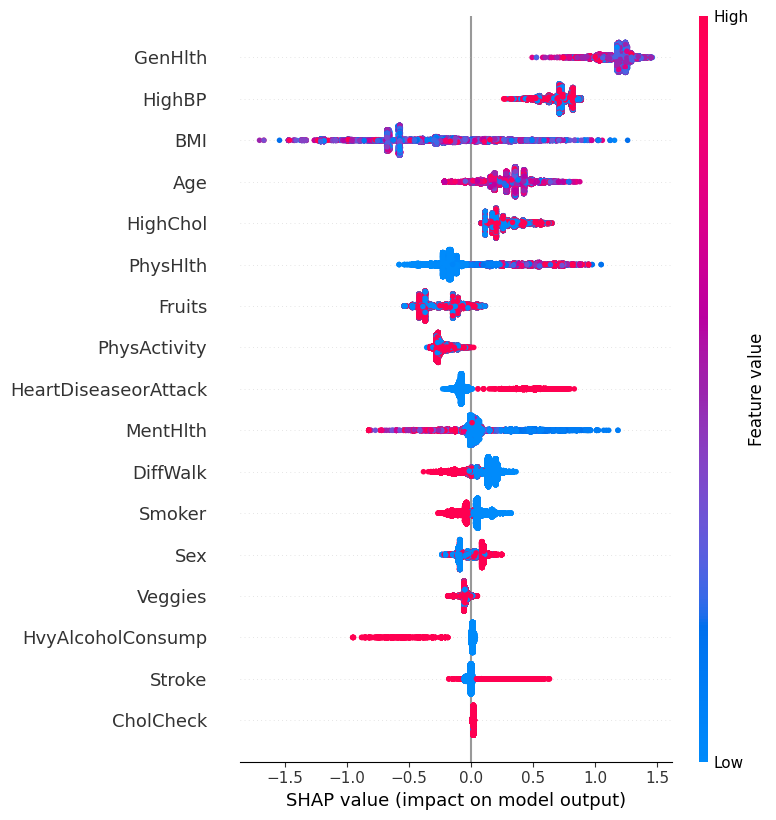

In [64]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, X_test)

Interprete los Resultados:

Respuesta: las variables que más impacto tienen en general sobre el modelo para la mayoría de las instancias se alejan de 0 en cuanto al valor shap promedio que es cero, y son GenHlth, HighBP, Age, HighCol, entre otros. En general, dichas variables importantes tienen una dispersión pequeña, porque cada una de ellas tiene instancias en pocos valores, mientras que solo para BMI la dispersión es mayor. Además, podemos decir que dichas distribuciones son aproximadamente simétricas, y que para las variables que no tienen un SHAP value tan grande, se puede distinguir más fácilmente si tienen individual o instancialmente valores altos o bajos para las features (de la mitad del gráfico para abajo se ve claramente la división rojo y azul para cada feature).

¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

Respuesta: 'CholCheck', 'DiffWalk', 'GenHlth', 'HighBP', 'HighChol' y 'HvyAlcoholConsump' (como era de esperarse), y además las que afectan negativamente la probabilidad son 'BMI', 'Fruits', 'PhysActivity' y 'Veggies' era en el caso de las tres instancias. Por lo tanto, las diferencias son: 1) el objeto de análisis (en el caso global es todo el conjunto de datos, en el caso local son solo las 3 instancias), 2) el enfoque (en el caso global se muestra el promedio del impacto de cada variable y en el caso local el impacto individual de cada variable), la utilidad (en el caso global la interpretación es general y en el caso local es específica). Por ende, las explicaciones globales ayudan a comprender el modelo, mientras que las explicaciones locales ayudan a justificar decisiones individuales hechas por el modelo, como en nuestro caso es la clasificación de si una persona tiene o no diabetes, en el contexto de nuestro modelo XGBClassifier.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

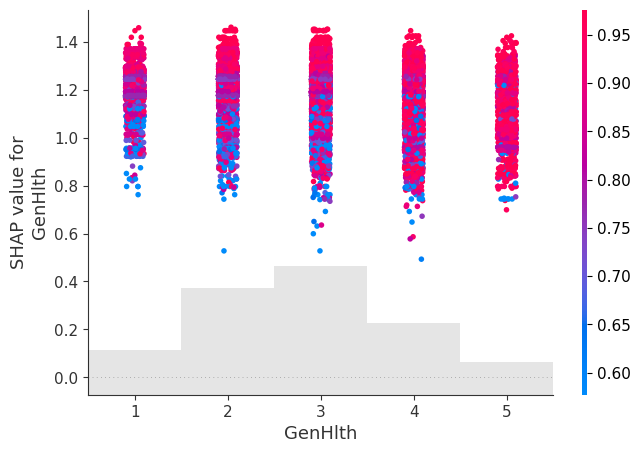

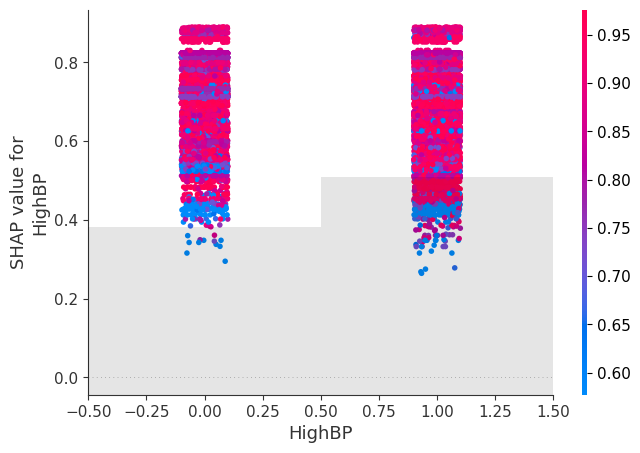

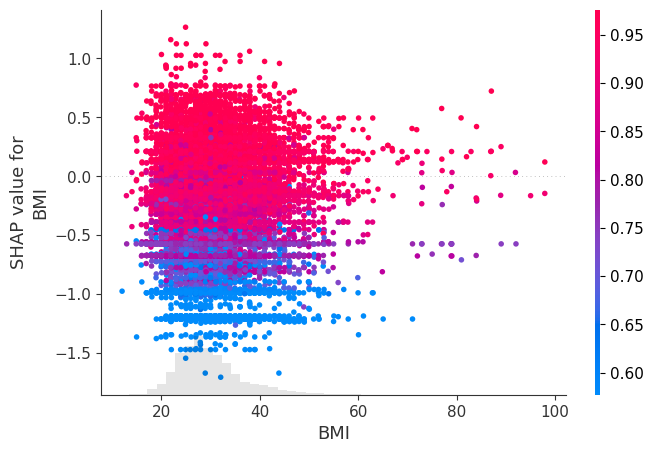

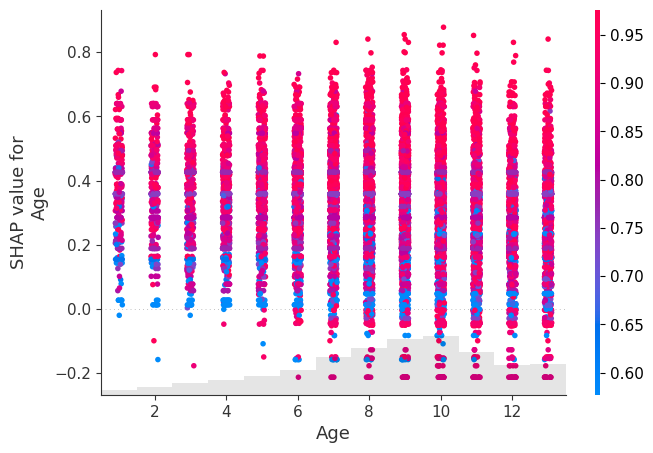

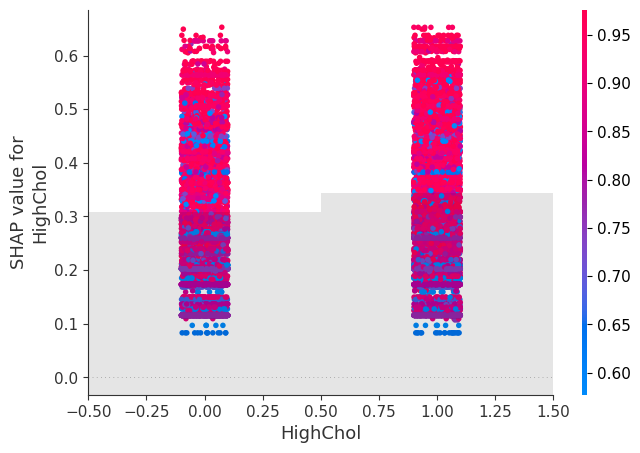

In [70]:
# Inserte código para generar gráficos de feature vs shap value aquí
shap_abs_mean = np.abs(shap_values.values).mean(axis=0)
top_5_indices = np.argsort(shap_abs_mean)[-5:][::-1]
top_5_features = X_test.columns[top_5_indices]
probs = model.predict_proba(X_test)[:, 1]
for feature in top_5_features:
    shap.plots.scatter(shap_values[:, feature], color=probs)

En general, de los gráficos podemos concluir que el GenHlth es el que más hace aumentar la probabilidad al aumentar su valor, mientras que BMI posee una distribución algo rara, porque los shap values promedio de dicha feature se distribuyen en dos grupos, uno con probabilidades altas y otro con bajas, para BMI casi siempre igual. Por otro lado, para Age, alto nivel de colesterol y HighBP, la distribución es casi uniforme para todos los valores de dichas variables.

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

La línea azul muestra cómo cambia la salida promedio del modelo (por ejemplo, en nuestro caso sería la probabilidad de diabetes) cuando solo se varía esa feature y se mantienen las demás constantes. El valor esperado del modelo aumenta para todos excepto para BMI y AGE (para las cuales se mantiene constante y crece, respectivamente, a partir de los valores iniciales) Dichas conclusiones pueden ser **aproximadamente generalizables** al conjunto completo de datos solo **si se ha utilizado una muestra representativa** (como en este caso, con 1000 observaciones, que no obstante si bien son elegidas al azar, podría ser no representativa o bien ser una rareza estadística). Sin embargo, como el PDP depende del supuesto de independencia entre las features (algo que muchas veces no se cumple), **estas conclusiones deben ser complementadas con otros análisis** como los Individual Conditional Expectation (ICE) plots o los SHAP values a nivel de instancia para obtener una visión completa del comportamiento del modelo.

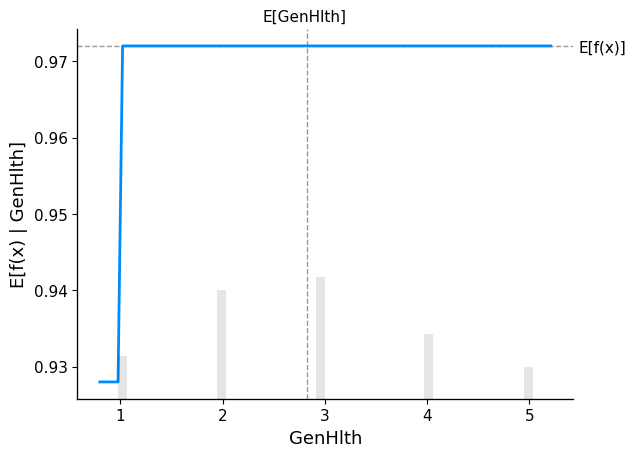

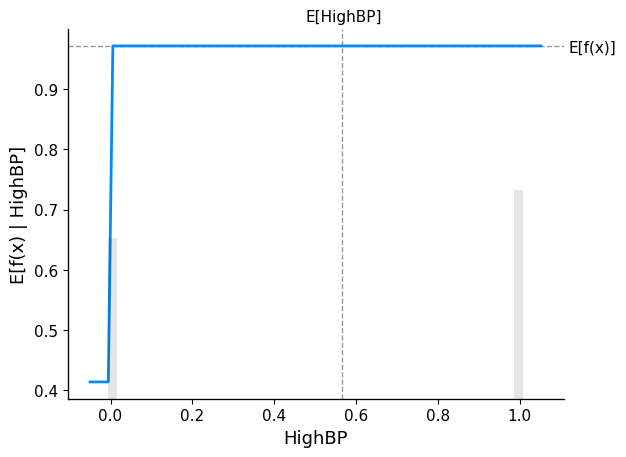

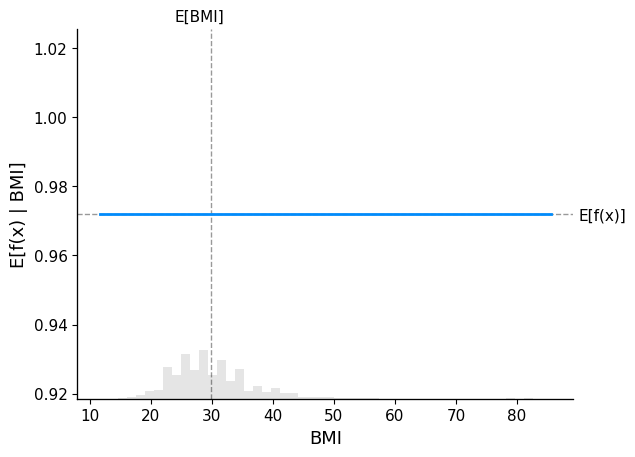

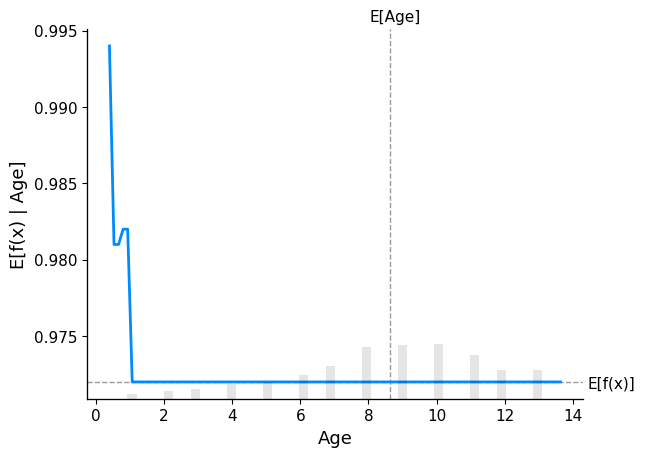

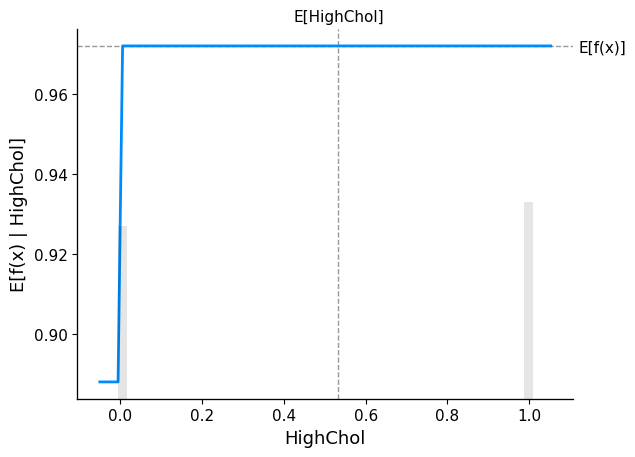

In [ ]:
# Inserte código para generar gráficos PDP aquí
#definimos nuestro X_test de sub muestra fijando la semilla para
#tener reproducibilidad.
X_test_subsample = X_test.sample(n=1000, random_state=42)

for feature in top_5_features:
    shap.partial_dependence_plot(
        feature,
        model.predict,
        X_test_subsample,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False, #ice: individual curves expectation (value), indica si se muestra o no dichas 
                  #curvas además de la promedio
    )

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [28]:
!pip install alibi

  Using cached alibi-0.9.6-py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.8 MB/s eta 0:00:00
  Installing build dependencies ... /^C
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/bin/pip", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pip/_internal/cli/main.py", line 79, in main
    return command.main(cmd_args)
           ~~~~~~~~~~~~^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pip/_internal/cli/base_command.py", line 156, in main
    with self.main_context():
         ~~~~~~~~~~~~~~~~~^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/contextlib.py", line 148, in __exit__
    next(self.gen)
    ~~~~^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pip/_internal/c

In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>